In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#Import CSV
SuicideData = pd.read_csv("Suicides_per_year.csv")
SocialData = pd.read_csv("users-by-social-media-platform.csv")

In [3]:
# Calculate total social media users per year
Social=SocialData.rename(columns = {'Entity':"Platform", "Monthly active users (Statista and TNW (2019))":"Monthly Users"})
SocialMedia = Social.groupby(["Year"])
Total_Users = SocialMedia.sum().reset_index().rename(columns={"Monthly Users":"Total Monthly Users"})
Total_Users

,Year,Total Monthly Users
0,2002,3000000
1,2003,4470000
2,2004,15525405
3,2005,55892892
4,2006,133727481
5,2007,323723343
6,2008,649259280
7,2009,939537344
8,2010,1459764216
9,2011,1975107328


In [4]:
# Separate into separte columns for each social media platform
Platforms = Social["Platform"].unique().tolist()

Social_Media = []
for platform in Platforms:
    x = (Social.loc[(Social["Platform"]==platform)]).rename(columns={"Monthly Users":f"{platform} Monthly Users"})
    x= x[["Year", f"{platform} Monthly Users" ]]
    Social_Media = pd.merge(Total_Users, x, on='Year', how = "outer")
    Total_Users = Social_Media

Social_Media = Social_Media.fillna(0)
Social_Media
Social_Media=Social_Media.rename(columns={"Year":"year"})
Social_Media

    

,year,Total Monthly Users,Facebook Monthly Users,Flickr Monthly Users,Friendster Monthly Users,Google Buzz Monthly Users,Google+ Monthly Users,Hi5 Monthly Users,Instagram Monthly Users,MySpace Monthly Users,...,Pinterest Monthly Users,Reddit Monthly Users,Snapchat Monthly Users,TikTok Monthly Users,Tumblr Monthly Users,Twitter Monthly Users,WeChat Monthly Users,Weibo Monthly Users,Whatsapp Monthly Users,YouTube Monthly Users
0,2002,3000000,0.000000e+00,0.0,3000000.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
1,2003,4470000,0.000000e+00,0.0,4470000.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
2,2004,15525405,0.000000e+00,3675135.0,5970054.0,0.0,0.0,0.0,0.000000e+00,980036.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
3,2005,55892892,0.000000e+00,7399354.0,7459742.0,0.0,0.0,9731610.0,0.000000e+00,19490059.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,1.946322e+06
4,2006,133727481,0.000000e+00,14949270.0,8989854.0,0.0,0.0,19932360.0,0.000000e+00,54763260.0,...,0.0,248309.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,1.987825e+07
5,2007,323723343,0.000000e+00,29299875.0,24253200.0,0.0,0.0,29533250.0,0.000000e+00,69299875.0,...,0.0,488331.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,1.439322e+08
6,2008,649259280,1.000000e+08,30000000.0,51008911.0,0.0,0.0,55045618.0,0.000000e+00,72408233.0,...,0.0,1944940.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,2.944940e+08
7,2009,939537344,2.760000e+08,41834525.0,28804331.0,0.0,0.0,57893524.0,0.000000e+00,70133095.0,...,0.0,3893524.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,4.136114e+08
8,2010,1459764216,5.177500e+08,54708063.0,0.0,166029650.0,0.0,59953290.0,0.000000e+00,68046710.0,...,0.0,0.0,0.0,0.0,0.0,43250000.0,0.000000e+00,19532900.0,0.000000e+00,4.805520e+08
9,2011,1975107328,7.660000e+08,66954600.0,0.0,170000000.0,0.0,46610848.0,0.000000e+00,46003536.0,...,0.0,0.0,0.0,0.0,0.0,92750000.0,4.781840e+07,48691040.0,0.000000e+00,6.426698e+08


In [5]:
data_df= pd.merge(SuicideData,Social_Media, on ="year",how="left")
data_df = data_df.fillna(0)
data_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),...,Pinterest Monthly Users,Reddit Monthly Users,Snapchat Monthly Users,TikTok Monthly Users,Tumblr Monthly Users,Twitter Monthly Users,WeChat Monthly Users,Weibo Monthly Users,Whatsapp Monthly Users,YouTube Monthly Users
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.0,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.0,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.0,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.0,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.0,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_grouped=data_df.groupby(["country-year"])
print (data_grouped)
by_country_year=data_grouped[["suicides_no", "suicides/100k pop"]].sum()
by_country_year.head()

,suicides_no,suicides/100k pop
country-year,,
Albania1987,73,31.85
Albania1988,63,32.46
Albania1989,68,33.40
Albania1992,47,18.00
Albania1993,73,32.56


In [7]:
for_merge= by_country_year.reset_index().rename(columns={"suicides_no":"Total Suicides per year", "suicides/100k pop":"Total Suicides/100K per year"})
Data_sum = pd.merge(data_df, for_merge, on="country-year", how="left")
Data_sum.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),...,Snapchat Monthly Users,TikTok Monthly Users,Tumblr Monthly Users,Twitter Monthly Users,WeChat Monthly Users,Weibo Monthly Users,Whatsapp Monthly Users,YouTube Monthly Users,Total Suicides per year,Total Suicides/100K per year
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.0,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73,31.85
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.0,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73,31.85
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.0,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73,31.85
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.0,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73,31.85
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.0,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73,31.85


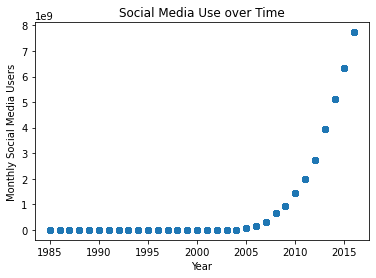

In [8]:
# Plot total social media users over time
fig1 = plt.scatter(data_df['year'], data_df['Total Monthly Users'])
plt.title("Social Media Use over Time")
plt.xlabel("Year")
plt.ylabel("Monthly Social Media Users")
plt.savefig("Social Media Use Plots/Total Monthly Users.png")

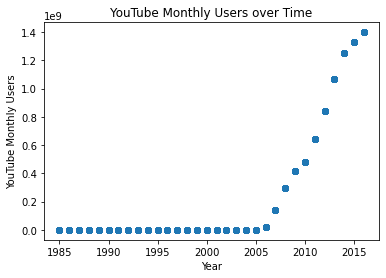

In [9]:
for platform in Platforms:
    plt.close()
    x = data_df['year']
    y = data_df[f"{platform} Monthly Users"]
    plt.scatter(x, y)
    plt.title(f"{platform} Monthly Users over Time")
    plt.xlabel("Year")
    plt.ylabel(f"{platform} Monthly Users")
    plt.savefig(f"Social Media Use Plots/{platform} Monthly Users.png")
    

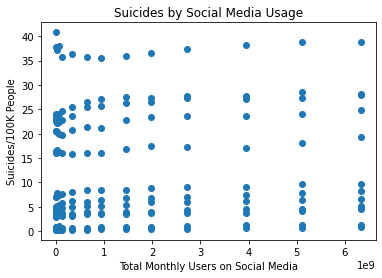

In [10]:
USData = data_df[(data_df['country']=="United States") ]
y_axis = USData['suicides/100k pop'].loc[(USData['Total Monthly Users']>0)]
x_axis = USData['Total Monthly Users'].loc[(USData['Total Monthly Users']>0)]
plt.scatter(x_axis, y_axis)
plt.title("Suicides by Social Media Usage")
plt.xlabel("Total Monthly Users on Social Media")
plt.ylabel("Suicides/100K People")
plt.show()

No Data for Generation=G.I. Generation


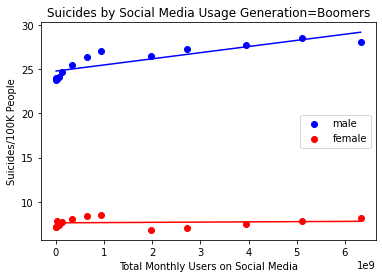

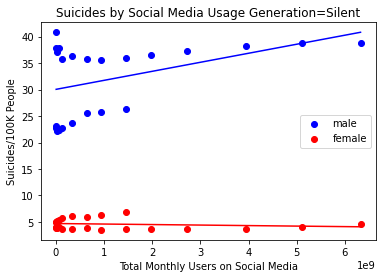

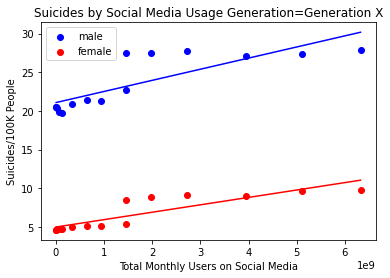

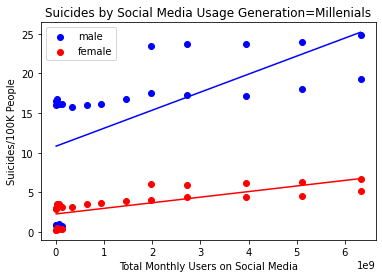

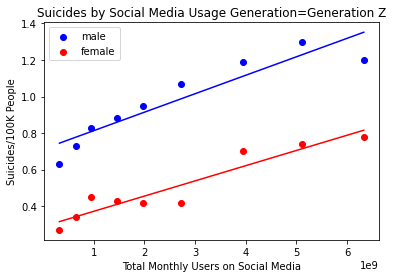

In [23]:
generations = USData['generation'].unique().tolist()
for generation in generations:
    plt.close()
    try:
        y_axis_male = USData['suicides/100k pop'].loc[(USData['Total Monthly Users']>0)& (USData['generation']==generation)&(USData['sex']=="male")]
        x_axis_male = USData['Total Monthly Users'].loc[(USData['Total Monthly Users']>0)& (USData['generation']==generation)&(USData['sex']=="male")]
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_male, y_axis_male)
        regress_values = x_axis_male * slope + intercept
        plt.scatter(x_axis_male, y_axis_male, color='blue', label = "male")
        plt.plot(x_axis_male, regress_values, '-b')
        #plt.annotate(line_eq,(18,37),fontsize=15,color="blue")
        y_axis_female = USData['suicides/100k pop'].loc[(USData['Total Monthly Users']>0)& (USData['generation']==generation)&(USData['sex']=="female")]
        x_axis_female = USData['Total Monthly Users'].loc[(USData['Total Monthly Users']>0)& (USData['generation']==generation)&(USData['sex']=="female")]
        plt.scatter(x_axis_female, y_axis_female, color='red', label = "female")
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_female, y_axis_female)
        regress_values = x_axis_male * slope + intercept
        plt.plot(x_axis_male, regress_values, '-r')
        #plt.annotate(line_eq,(18,37),fontsize=15,color="blue")
        plt.legend(loc="best")
        plt.title(f"Suicides by Social Media Usage Generation={generation}")
        plt.xlabel("Total Monthly Users on Social Media")
        plt.ylabel("Suicides/100K People")
        plt.savefig(f"Suicides by Social Media Use/{generation} Suicides by Social Media Use.png")
        plt.show()
    except:
        print(f"No Data for Generation={generation}")
   